In [1]:
import numpy as np
import matplotlib.pyplot as plt

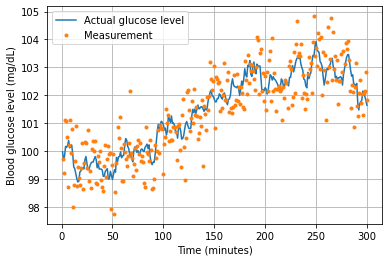

In [37]:
np.random.seed(9)

steps = 300
dt = 1
c = -1/5
q = 0.01
r = 0.5
t = 0
x = np.array([100, 0, 0, 0])
F = np.array([[1, 0, dt, 0],
              [0, 1, 0, dt],
              [0, 0, 0, 0],
              [0, c, 0, 0]])
H = np.array([[1, 1, 0, 0]])
mean = np.array([0, 0, 0, 0])
Q = np.array([[q, 0, 0, 0], 
               [0, q, 0, 0], 
               [0, 0, q, 0], 
               [0, 0, 0, q]])
R = np.array([[r]])
T = np.zeros((steps,))  # Time vector
X = np.zeros((steps, 4))  # State vector
Y = np.zeros((steps, 1))  # Measurement vector

def w():
    return np.random.multivariate_normal(mean=mean, cov=Q)

def v():
    return np.random.multivariate_normal(mean=[0], cov=R)

for k in range(steps):
    x = F @ x + w()
    y = H @ x + v()
    t = t + dt

    X[k, :] = x
    Y[k:, ] = y
    T[k] = t

plt.clf()
plt.plot(T, X[:,0] + X[:, 1], T, Y[:,0], '.')
plt.legend(['Actual glucose level', 'Measurement'])
plt.ylabel('Blood glucose level (mg/dL)')
plt.xlabel('Time (minutes)')
plt.grid()

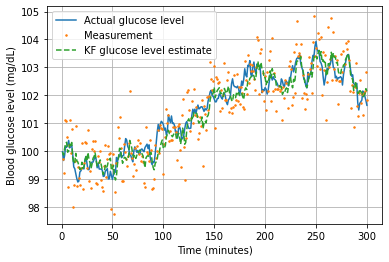

In [60]:
m0 = np.array([100, 0, 0, 0])
p0 = np.array([[q, 0, 0, 0], 
               [0, q, 0, 0], 
               [0, 0, q, 0], 
               [0, 0, 0, q]])
m = m0
P = p0
kf_m = np.zeros((Y.shape[0], m.shape[0]))
kf_P = np.zeros((Y.shape[0], P.shape[0], P.shape[1]))
for k in range(Y.shape[0]):
    # Prediction
    m = F @ m
    P = F @ P @ F.T + Q
    # Update
    S = H @ P @ H.T + R
    K = P @ H.T @ np.linalg.inv(S)
    m = m + K @ (Y[k] - H @ m)
    P = P - K @ S @ K.T
    kf_m[k,:] = m
    kf_P[k,:,:] = P
    
plt.clf()
plt.plot(T, X[:,0] + X[:, 1], T, Y[:,0], '.',T, kf_m[:,0] + kf_m[:,1],'--', markersize=3)
plt.legend(['Actual glucose level','Measurement','KF glucose level estimate'])
plt.ylabel('Blood glucose level (mg/dL)')
plt.xlabel('Time (minutes)')
plt.grid()
plt.savefig('img.svg', dpi=350)

In [42]:
rmse_raw = np.sqrt(np.mean(((X[:,0] + X[:, 1]) - Y[:,0])**2))
print(rmse_raw)

0.7319457471650517


In [43]:
p_rmse_kf = np.sqrt(np.mean(((X[:,0] + X[:, 1]) - (kf_m[:,0] + kf_m[:,1]))**2))
print(p_rmse_kf)

0.3666520142689184
